 # *Link de Estudo:*  
 - https://www.kaggle.com/code/robertopivetta/otimiza-o-de-portf-lio/notebook
 - https://opencodecom.net/post/2021-05-07-fronteira-eficiente/

In [3]:
!pip install pandas-datareader

     |████████████████████████████████| 109 kB 2.4 MB/s            


In [4]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
ativos = ['ABEV3.SA', 'EQTL3.SA', 'LREN3.SA', 'CIEL3.SA', 'RADL3.SA', 'RENT3.SA', 'MDIA3.SA', 'WEGE3.SA', 'EZTC3.SA', 'FLRY3.SA']

In [98]:
carteira = pd.DataFrame()

for t in ativos:
  carteira[t] = wb.DataReader(t, data_source = 'yahoo', start = '2014-01-01', end = '2021-05-03')['Adj Close']

<AxesSubplot:xlabel='Date'>

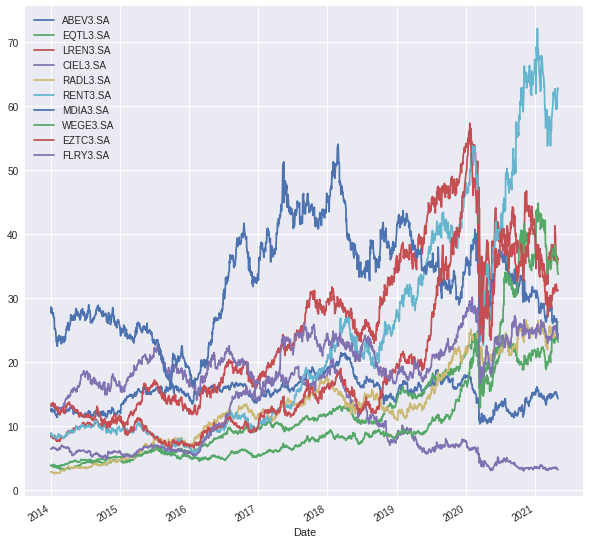

In [99]:
carteira.plot(figsize = (10,10))

In [100]:
carteira.head()

,ABEV3.SA,EQTL3.SA,LREN3.SA,CIEL3.SA,RADL3.SA,RENT3.SA,MDIA3.SA,WEGE3.SA,EZTC3.SA,FLRY3.SA
Date,,,,,,,,,,
2014-01-02,12.606937,3.799151,8.318116,13.013498,2.777739,8.708322,27.701933,3.827154,13.389574,6.380665
2014-01-03,12.338703,3.735804,8.435135,13.178846,2.735569,8.881157,28.597258,3.791904,13.427874,6.380665
2014-01-06,12.179216,3.695796,8.316706,13.194592,2.781406,8.697683,28.207136,3.812046,13.399151,6.450021
2014-01-07,12.563439,3.695796,8.481656,13.346163,2.796075,8.639183,28.347471,3.809528,13.456595,6.450021
2014-01-08,12.686682,3.710799,8.466151,13.365850,2.796075,8.668433,28.066803,3.744062,13.403937,6.522843


In [30]:
retorno_diario = carteira.pct_change()
retorno_diario.head()

,ABEV3.SA,EQTL3.SA,LREN3.SA,CIEL3.SA,RADL3.SA,RENT3.SA,MDIA3.SA,WEGE3.SA,EZTC3.SA,FLRY3.SA
Date,,,,,,,,,,
2014-01-03,-0.021276,-0.016674,0.014068,0.012706,-0.015182,0.019848,0.032320,-0.009210,0.002860,0.000000
2014-01-06,-0.012926,-0.010710,-0.014040,0.001195,0.016756,-0.020659,-0.013642,0.005312,-0.002139,0.010869
2014-01-07,0.031548,0.000000,0.019834,0.011487,0.005274,-0.006726,0.004975,-0.000660,0.004287,0.000000
2014-01-08,0.009809,0.004060,-0.001829,0.001475,0.000000,0.003386,-0.009901,-0.017184,-0.003913,0.011290
2014-01-09,-0.023429,0.010782,-0.033139,-0.007363,-0.036065,-0.041411,-0.018400,-0.018158,-0.021429,-0.013291


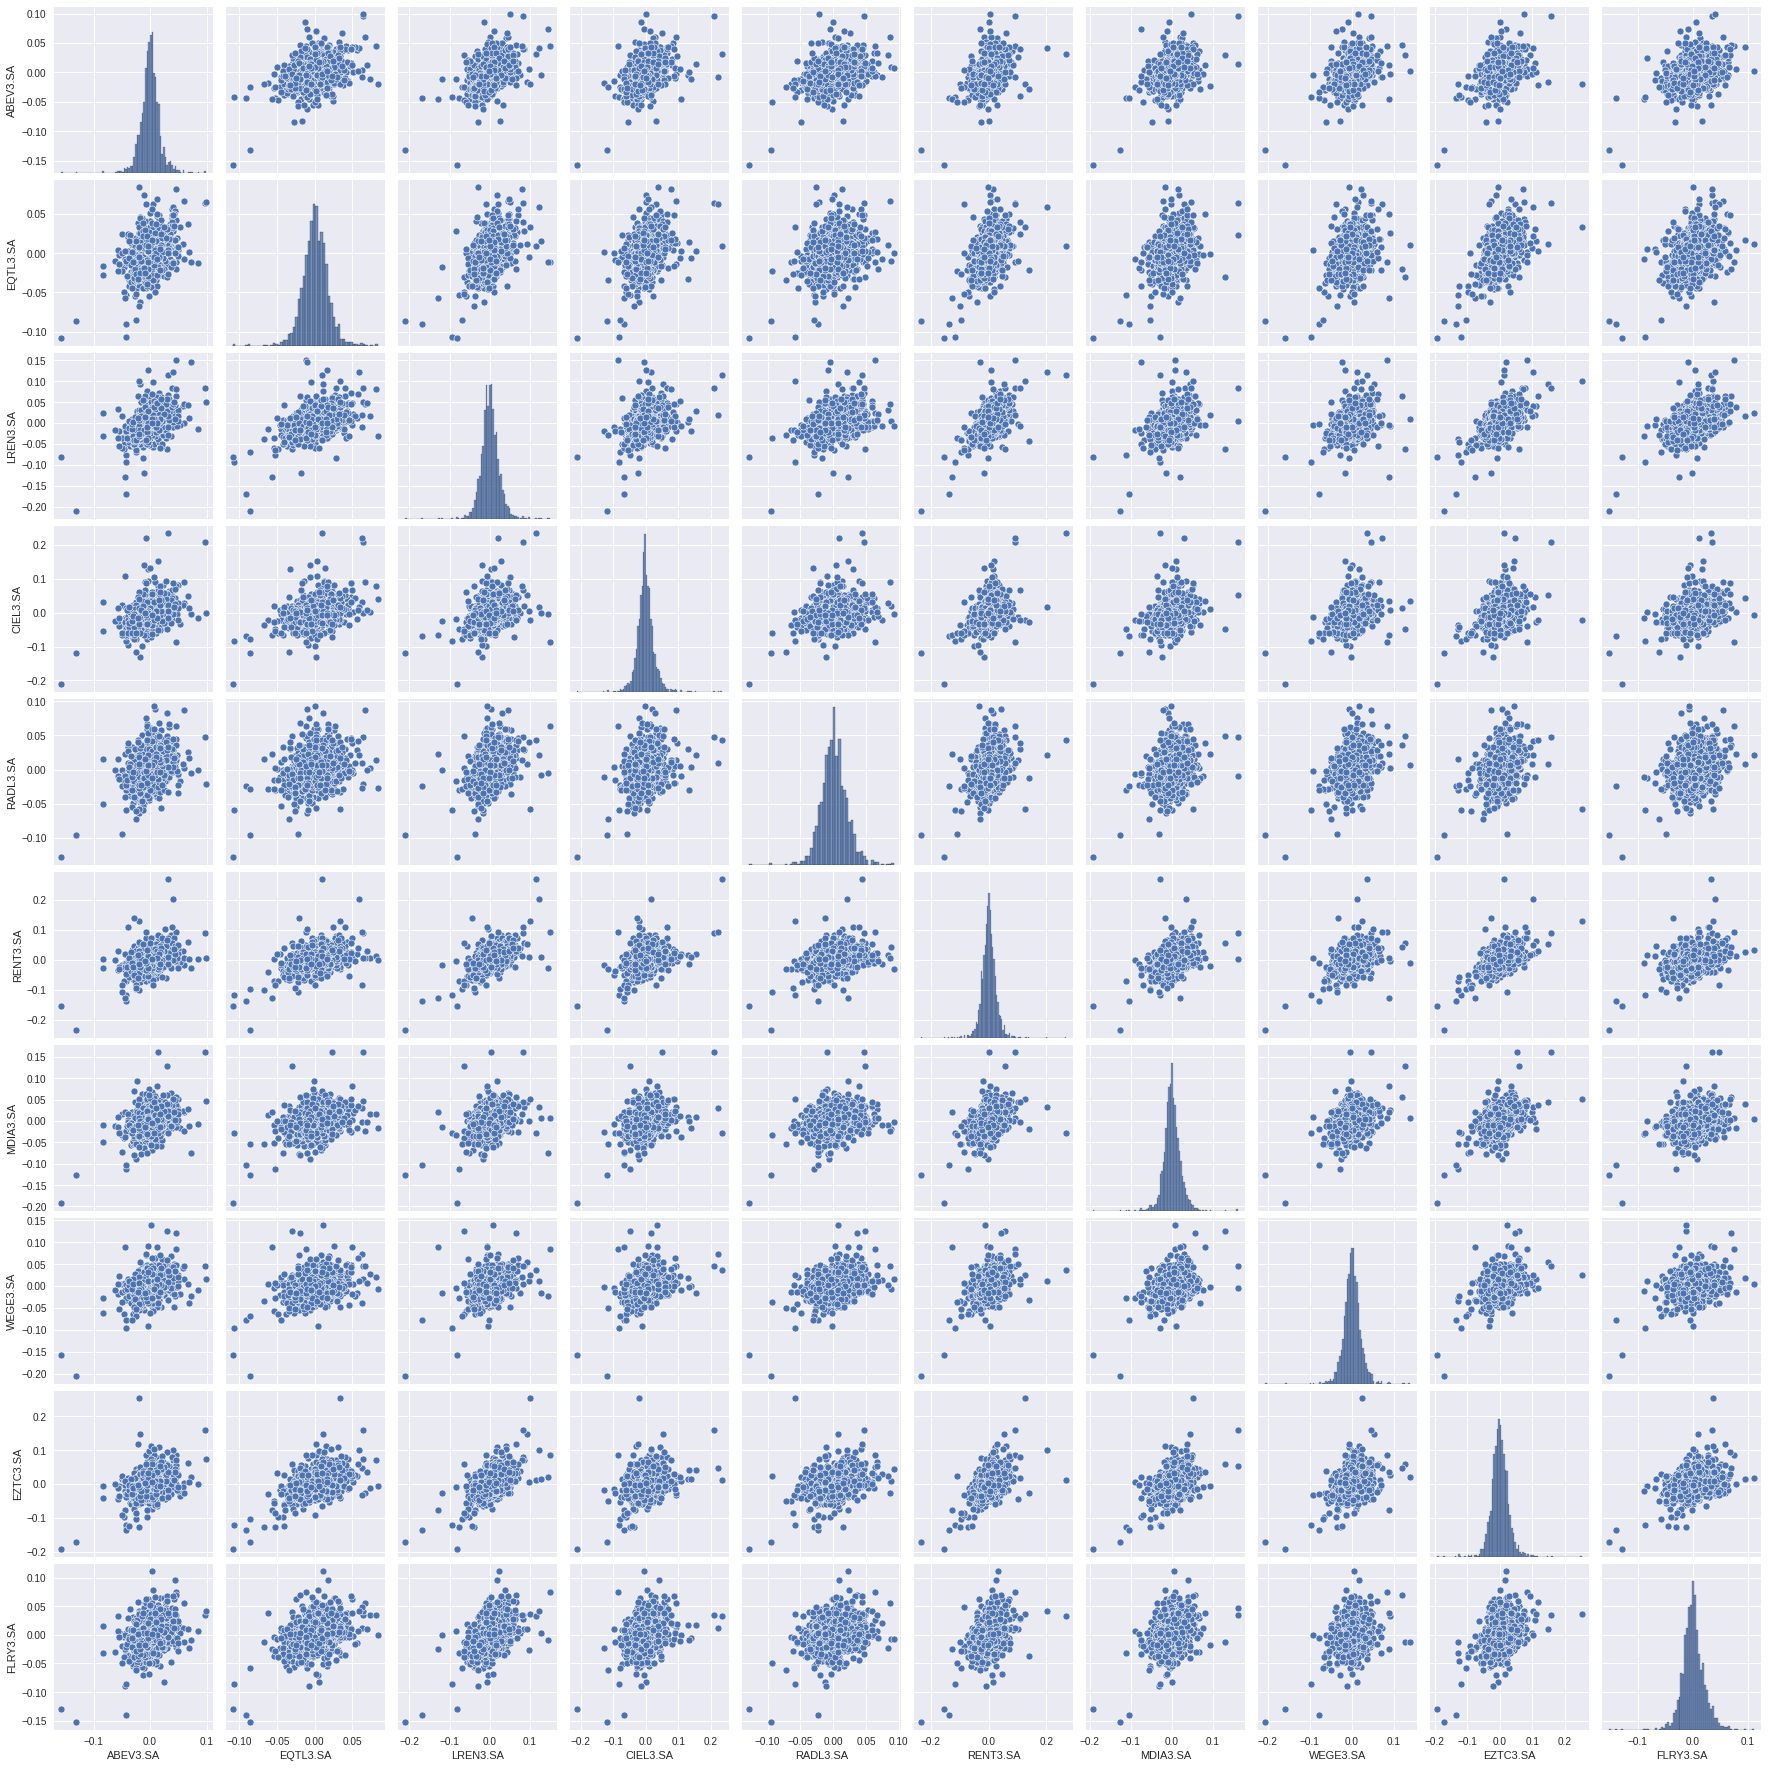

In [102]:
sns.pairplot(retorno_diario[1:])

In [101]:
retorno_diario = retorno_diario.iloc[1:]
retorno_diario.head()

,ABEV3.SA,EQTL3.SA,LREN3.SA,CIEL3.SA,RADL3.SA,RENT3.SA,MDIA3.SA,WEGE3.SA,EZTC3.SA,FLRY3.SA
Date,,,,,,,,,,
2014-01-06,-0.012926,-0.010710,-0.014040,0.001195,0.016756,-0.020659,-0.013642,0.005312,-0.002139,0.010869
2014-01-07,0.031548,0.000000,0.019834,0.011487,0.005274,-0.006726,0.004975,-0.000660,0.004287,0.000000
2014-01-08,0.009809,0.004060,-0.001829,0.001475,0.000000,0.003386,-0.009901,-0.017184,-0.003913,0.011290
2014-01-09,-0.023429,0.010782,-0.033139,-0.007363,-0.036065,-0.041411,-0.018400,-0.018158,-0.021429,-0.013291
2014-01-10,0.006437,0.000000,-0.011540,0.005044,0.009524,0.011200,0.008558,-0.006165,0.003650,0.002155


In [11]:
retorno_anual = retorno_diario.mean()*250

In [12]:
cov_diario = retorno_diario.cov()
cov_diario
cov_anual = cov_diario*250

In [13]:
port_returns = []
port_volatility = []
stock_weights = []

In [17]:
num_assets = len(ativos)
num_portfolios = 200

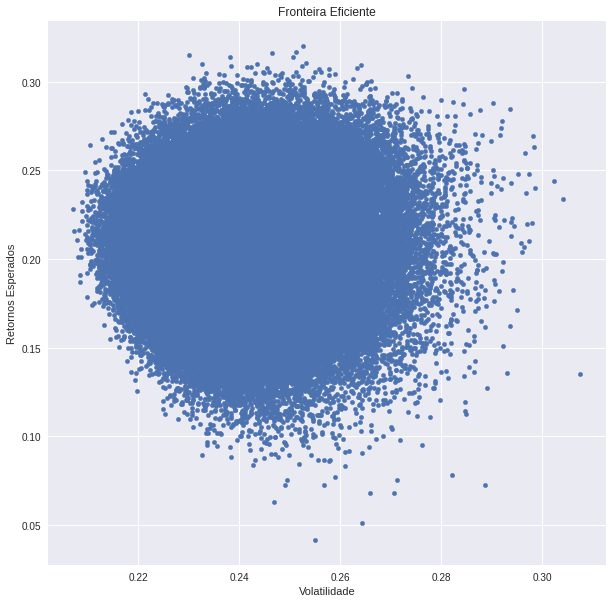

In [28]:
peso = np.random.random(num_assets)
peso /= np.sum(peso)
peso
np.sum(peso)
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, retorno_anual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_anual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)
    portfolio = {'Retornos': port_returns, 'Volatilidade': port_volatility}
for counter,symbol in enumerate(ativos):
    portfolio[symbol+' peso'] = [weight[counter] for weight in stock_weights]
df = pd.DataFrame(portfolio)
df.head()
retornos = df.sort_values(by = ['Retornos'], ascending = False)
retornos.head()
plt.style.use('seaborn')

df.plot.scatter(x = 'Volatilidade', y = 'Retornos', figsize = (10,10), grid = True)

plt.xlabel('Volatilidade')

plt.ylabel('Retornos Esperados')

plt.title('Fronteira Eficiente')

plt.show()

In [109]:
retorno_max = retornos.iloc[:1]
retorno_max = retorno_max.drop(['Retornos', 'Volatilidade'], axis = 1)
retorno_max
pesos = np.array(retorno_max)
pesos
retorno_carteira = retorno_diario*pesos

In [110]:
retorno_carteira

,ABEV3.SA,EQTL3.SA,LREN3.SA,CIEL3.SA,RADL3.SA,RENT3.SA,MDIA3.SA,WEGE3.SA,EZTC3.SA,FLRY3.SA
Date,,,,,,,,,,
2014-01-06,-0.000038,-0.001289,-0.001625,0.000033,0.003533,-0.004972,-0.000111,0.001315,-0.000018,0.000197
2014-01-07,0.000092,0.000000,0.002296,0.000313,0.001112,-0.001619,0.000041,-0.000163,0.000036,0.000000
2014-01-08,0.000029,0.000489,-0.000212,0.000040,0.000000,0.000815,-0.000081,-0.004255,-0.000032,0.000204
2014-01-09,-0.000069,0.001298,-0.003836,-0.000200,-0.007605,-0.009966,-0.000150,-0.004496,-0.000178,-0.000241
2014-01-10,0.000019,0.000000,-0.001336,0.000137,0.002008,0.002695,0.000070,-0.001526,0.000030,0.000039
...,...,...,...,...,...,...,...,...,...,...
2021-04-27,-0.000056,-0.000625,-0.002960,-0.000936,0.001557,-0.003420,-0.000289,-0.002024,-0.000082,-0.000329
2021-04-28,-0.000015,0.002708,-0.001146,-0.000894,0.009018,0.008201,-0.000243,-0.003412,-0.000035,0.000043
2021-04-29,0.000010,0.002033,-0.000087,-0.000154,-0.002553,0.000953,-0.000036,-0.006852,0.000047,0.000043


In [114]:
#Retrono Total da carteira
retorno_carteira = retorno_carteira.sum(axis=1)

<AxesSubplot:xlabel='Date'>

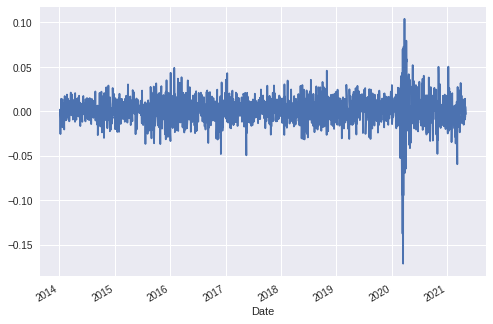

In [115]:
retorno_carteira.plot()

<AxesSubplot:xlabel='Date'>

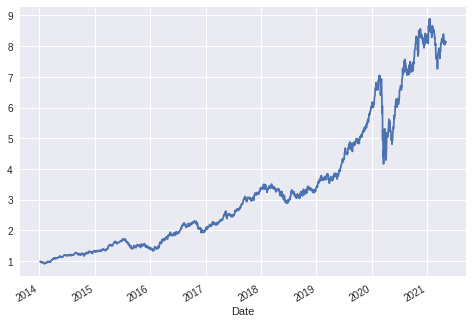

In [116]:
returns_acm = (1 + retorno_carteira).cumprod()
returns_acm.plot()

<AxesSubplot:xlabel='Date'>

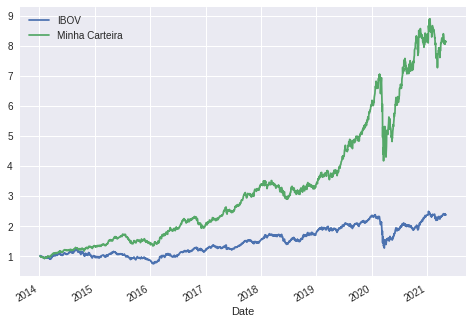

In [118]:
ibov = wb.DataReader('^BVSP', data_source = 'yahoo', start = '2014-01-01', end = '2021-05-03')['Adj Close']
type(ibov)
pd.core.series.Series
ibov_retornos = ibov.pct_change()
ibov_retornos_acm = (1 + ibov_retornos).cumprod()
pd.DataFrame(ibov_retornos_acm)
novo_df = pd.merge(pd.DataFrame(ibov_retornos_acm), pd.DataFrame(returns_acm, columns = ['Minha Carteira']), how = 'inner', on = 'Date')
novo_df.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)
novo_df.head()
novo_df.plot()